In [355]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
yearsFmt = mdates.DateFormatter('%MMM')


In [106]:
Data = pd.read_pickle('MetData')

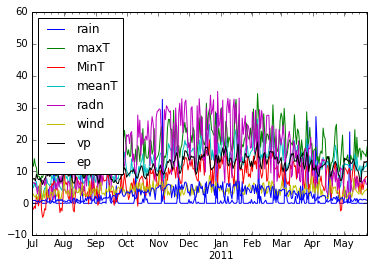

In [107]:
Data.plot()

In [175]:
plt.rcParams['font.family'] = 'fantasy'
plt.rcParams['legend.frameon'] = False

In [353]:
IrrigationShallow.cumsum()

,Irrig
2010-07-01,0.0
2010-07-02,0.0
2010-07-03,0.0
2010-07-04,0.0
2010-07-05,0.0
2010-07-06,0.0
2010-07-07,0.0
2010-07-08,0.0
2010-07-09,0.0
2010-07-10,0.0


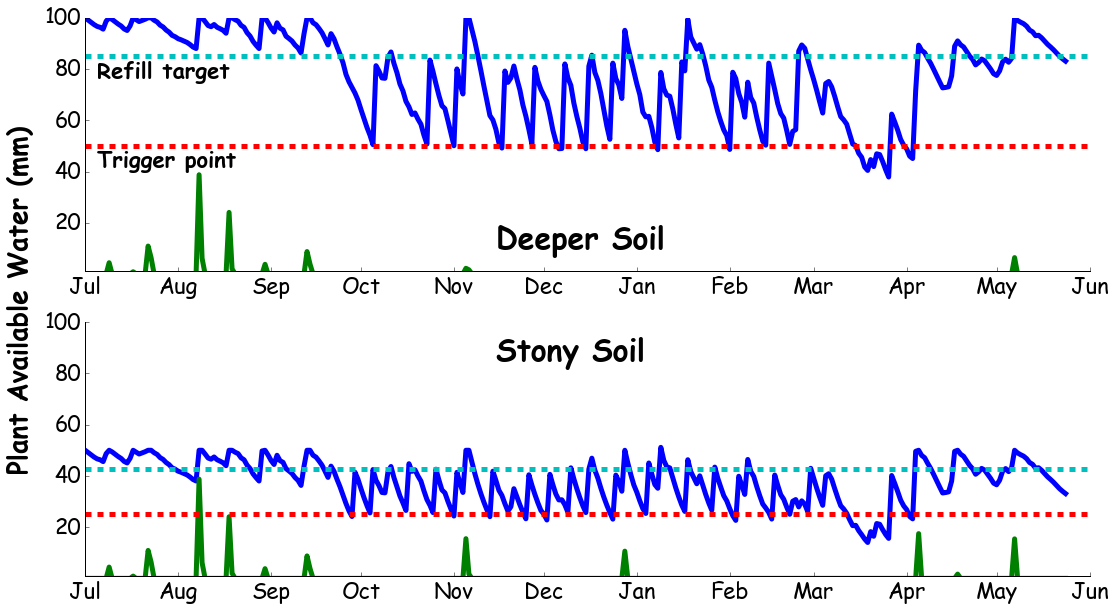

In [399]:
PAWarrayDeep = []
DrainarrayDeep = []
SWCDeep = 200 
PAWDeep = AWC * 0.5
DrainageDeep = 0
IrrigationDeep = pd.DataFrame(index=Data.index,columns=['Irrig'],data=0)
amount = 35
IrrigationDeep.ix['2010-10-06','Irrig'] = amount
IrrigationDeep.ix['2010-10-24','Irrig'] = amount
IrrigationDeep.ix['2010-11-02','Irrig'] = amount
IrrigationDeep.ix['2010-11-18','Irrig'] = amount
IrrigationDeep.ix['2010-11-28','Irrig'] = amount
IrrigationDeep.ix['2010-12-08','Irrig'] = amount
IrrigationDeep.ix['2010-12-16','Irrig'] = amount
IrrigationDeep.ix['2010-12-24','Irrig'] = amount
IrrigationDeep.ix['2011-01-09','Irrig'] = amount
IrrigationDeep.ix['2011-01-16','Irrig'] = amount
IrrigationDeep.ix['2011-02-02','Irrig'] = amount
IrrigationDeep.ix['2011-02-14','Irrig'] = amount
IrrigationDeep.ix['2011-02-24','Irrig'] = amount
#IrrigationDeep.ix['2011-03-04','Irrig'] = amount

PAWarrayShallow = []
DrainarrayShallow = []
SWCShallow = 100 
PAWShallow = SWCShallow * 0.5
DrainageShallow = 0
IrrigationShallow = pd.DataFrame(index=Data.index,columns=['Irrig'],data=0)
amount = 19.5
IrrigationShallow.ix['2010-09-29','Irrig'] = amount
IrrigationShallow.ix['2010-10-05','Irrig'] = amount
IrrigationShallow.ix['2010-10-17','Irrig'] = amount
IrrigationShallow.ix['2010-10-26','Irrig'] = amount
IrrigationShallow.ix['2010-11-2','Irrig'] = amount
IrrigationShallow.ix['2010-11-14','Irrig'] = amount
IrrigationShallow.ix['2010-11-26','Irrig'] = amount
IrrigationShallow.ix['2010-12-03','Irrig'] = amount
IrrigationShallow.ix['2010-12-10','Irrig'] = amount
IrrigationShallow.ix['2010-12-16','Irrig'] = amount
IrrigationShallow.ix['2010-12-25','Irrig'] = amount
IrrigationShallow.ix['2011-01-05','Irrig'] = amount
IrrigationShallow.ix['2011-01-09','Irrig'] = amount
IrrigationShallow.ix['2011-01-27','Irrig'] = amount
IrrigationShallow.ix['2011-02-04','Irrig'] = amount
IrrigationShallow.ix['2011-02-16','Irrig'] = amount
IrrigationShallow.ix['2011-02-28','Irrig'] = amount

for x in range(Data.index.size):
    if x > 0:
        EWDeep = (PAWarrayDeep[x-1])*0.1
        PAWDeep = PAWarrayDeep[x-1] + Data.rain[x] - min(Data.ep[x],EWDeep)
        DrainageDeep = max(0,PAWDeep - SWCDeep * 0.5)
        
        PAWDeep = PAWDeep - DrainageDeep + IrrigationDeep.ix[x][0]
        
        EWShallow = (PAWarrayShallow[x-1])*0.1
        PAWShallow = PAWarrayShallow[x-1] + Data.rain[x] - min(Data.ep[x],EWShallow)
        DrainageShallow = max(0,PAWShallow - SWCShallow * 0.5)
        PAWShallow = PAWShallow - DrainageShallow + IrrigationShallow.ix[x][0]
    
    PAWarrayDeep.append(PAWDeep)
    DrainarrayDeep.append(DrainageDeep)
    
    PAWarrayShallow.append(PAWShallow)
    DrainarrayShallow.append(DrainageShallow)

Data.ix[:,'SWCDeep'] = PAWarrayDeep#np.add(PAWarrayDeep,SWCDeep*0.5)
Data.ix[:,'DrainDeep'] = DrainarrayDeep
Data.ix[:,'SWCShallow'] = PAWarrayShallow#np.add(PAWarrayShallow,SWCShallow*0.5)
Data.ix[:,'DrainShallow'] = DrainarrayShallow

Figure = plt.figure(figsize = (18,10))
DeepFig = Figure.add_subplot(2,1,1)
plt.plot(Data.index,Data.SWCDeep,linewidth = 5)
plt.plot(Data.index,Data.DrainDeep,linewidth = 5)
plt.plot(['2010-07-01','2011-07-01'],[50,50],'--',linewidth=5)
plt.plot(['2010-07-01','2011-07-01'],[85,85],'--',linewidth=5)
plt.ylim(1,100)
plt.xlim('2010-07-01','2011-06-01')
plt.tick_params(labelsize=22)
plt.text('2010-06-05',50,'Plant Available Water (mm)', fontsize=26, weight='bold',rotation=90)
plt.text('2010-11-15',10,'Deeper Soil', fontsize=30, weight='bold')
plt.text('2010-07-05',77,'Refill target', fontsize=22, weight='bold')
plt.text('2010-07-05',42,'Trigger point', fontsize=22, weight='bold')
DeepFig.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
DeepFig.spines['right'].set_visible(False)
DeepFig.spines['top'].set_visible(False)
DeepFig.yaxis.set_ticks_position('left')
DeepFig.xaxis.set_ticks_position('bottom')
       
ShallowFig = Figure.add_subplot(2,1,2)
plt.plot(Data.index,Data.SWCShallow,linewidth = 5)
plt.plot(Data.index,Data.DrainShallow,linewidth = 5)
plt.plot(['2010-07-01','2011-07-01'],[25,25],'--',linewidth=5)
plt.plot(['2010-07-01','2011-07-01'],[42.5,42.5],'--',linewidth=5)
plt.ylim(1,100)
plt.xlim('2010-07-01','2011-06-01')
plt.tick_params(labelsize=22)
ShallowFig.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.text('2010-11-15',85,'Stony Soil', fontsize=30, weight='bold')
ShallowFig.spines['right'].set_visible(False)
ShallowFig.spines['top'].set_visible(False)
ShallowFig.yaxis.set_ticks_position('left')
ShallowFig.xaxis.set_ticks_position('bottom')